<a href="https://colab.research.google.com/github/spantoskey/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Scott_Pantoskey_LS_DS_131_Simple_Linear_Regression_Assignment_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3 Module 1

---

## Module Project: Simple Linear Regression


### Learning Objectives 

- identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- identify linear and nonlinear relationships from a scatterplot
- calculate and interpret linear correlation
- calculate and interpret the slope and intercept of a simple linear regression model
- predict a response from a simple linear regression model
- calculate and interpret a residual

## Part A

## Introduction

### Is head size related to brain weight in healthy adult humans?

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characteristics such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

(Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.)

Use the above information to complete Tasks 1 - 

**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [8]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url,skipinitialspace=True, header=0)
# print(len(df))

# Print out your DataFrame
df.head()

237


,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Task 1 - Test**

In [9]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2**

The two variables we are interested in - for now - are 

* `Brain` - the brain weight in kg
* `Head` - the head size in cubic cm

If we wish to predict brain weight from head size, which variable is the **independent variable** (also called the feature, explanatory, or x variable) and which variable is the **dependent variable** (also called the target, response or y variable)?

Using the DataFrame `df` you loaded above assign columns to the independent and dependent variables

* assign the independent variable to `ind_x`
* assign the dependent variable to `dep_y`

In [12]:
# Task 2
# ind_x = df['head']
# dep_y = df['Brain']

# YOUR CODE HERE
ind_x = df['Head']
dep_y = df['Brain']

**Task 2 - Test**

In [13]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Create a plot

This task will not be autograded - but it is part of the project!

Create a scatterplot showing the relationship between brain weight and head size.  Make sure to plot the correct variable on the correct axis and label your axes.

* import your plotting library
* plot your x- and y-variables on a scatter plot
* label the axes
* give your plot a title!

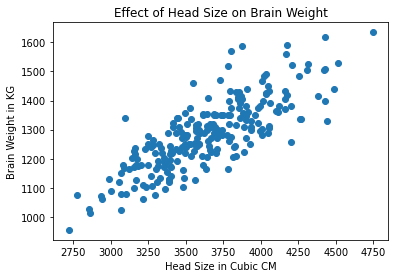

In [14]:
# Task 3
# (NOT autograded but fill in your code!)

# YOUR CODE HERE
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 

#Plot the scatterplot#

plt.scatter(x = ind_x, y = dep_y)

ax.set_title('Effect of Head Size on Brain Weight')
ax.set_xlabel('Head Size in Cubic CM')
ax.set_ylabel('Brain Weight in KG')


plt.show()

**Task 4** - Describe your plot

Describe the *strength* and *direction* of the relationship between head size and brain weight.

This task will not be autograded - but it is part of the project!

**Task 4 ANSWER: **

There is a clear, positive linear relationship between head size and brain weight. As you can see above, brain weight increases as head size increases and vice versa.

**Task 5** - Missing data

Now, let's determine if there is any missing data in the dataset. If there is, drop the row that contains a missing value.

* check for missing/null values and assign the sum to `num_null` - the result should be the sum of all the null values and a single integer (*Hint: you will compute the sum of a sum*)
* if their are null values, drop them in place (your DataFrame should still be (`df`)

In [21]:
# Task 5

# YOUR CODE HERE
null_values = df.isnull().sum()
df = df.dropna()
print(df)

     Gender  Age  Head  Brain
0         1    1  4512   1530
1         1    1  3738   1297
2         1    1  4261   1335
3         1    1  3777   1282
4         1    1  4177   1590
..      ...  ...   ...    ...
232       2    2  3214   1110
233       2    2  3394   1215
234       2    2  3233   1104
235       2    2  3352   1170
236       2    2  3391   1120

[237 rows x 4 columns]


**Task 5 - Test**

In [23]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Correlation coefficient

Now that's we've explored our data through a plot and checked for null values, we can move on to some calculations. First, we're going to calculate and interpret the correlation coefficient for the relationship between *head size* and *brain weight*.

* import numpy
* calculate the correlation coefficient and assign it to the variable `corr_coef`

In [24]:
# Task 6

# YOUR CODE HERE
import numpy as np
corr_coef = np.corrcoef(ind_x,dep_y)
# View the results
print('Correlation coefficient:', corr_coef)

Correlation coefficient: [[1.         0.79956971]
 [0.79956971 1.        ]]


**Task 6 - Test**

In [29]:
# Task 6 - Test

assert isinstance(corr_coef, np.ndarray), 'Your correlation coefficient calculation should return a numpy array.'

**Task 6** - Correlation coefficient written answer

Comment on the correlation coefficient value: Does the value align with your above plot? Is it a strong correlation or a weak correlation? In what direction? Your answer is not autograded but it is required for a complete project.

The correlation (~0.8) is quite strong between head size and brain weight, and this is in alignment with what we saw in the scatter plot (positive correlation and linear relationship).

**Task 7** - Correlation coefficient, part 2

**Without** doing any other calculations, determine the correlation of *brain weight* with *head size*.

* assign your result to `corr_coef_2`

In [28]:
# Task 7

# YOUR CODE HERE
corr_coef_2 = np.corrcoef(dep_y, ind_x)

# View the results
print('Correlation coefficient, part 2:', corr_coef_2)

Correlation coefficient, part 2: [[1.         0.79956971]
 [0.79956971 1.        ]]


**Task 7 - Test**

In [30]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Linear model

Now that we've calculated the correlation coefficient, we going to fit a linear model to our two variables. We'll use the `statsmodels` to calculate the least-squares regression coefficients (slope and intercept). Our two variables are head size (`Head`) and brain weight (`Brain`).

* the import statement has been provided (don't edit this)
* create and fit your model in one step; assign it to `model` (*Hint: remember the format of the input data is `Y ~ X`*)
* using the `model.params` method, assign the slope to the variable `slope`
* using the same `model.params` method, assign the intercept to the variable `intercept`

In [34]:
# Task 8

# Import OLS from statsmodel
from statsmodels.formula.api import ols

# YOUR CODE HERE
mode1 = ols('Brain ~ Head', data=df).fit()
slope = mode1.params[1]
intercept = mode1.params[0]

# View the model parameters
print('The slope is:', slope)
print('The intercept is:', intercept)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The slope is: 0.2634293394893992
The intercept is: 325.573421049442


**Task 8 - Test**

In [35]:
# Task 8 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Writing the linear equation

Use the model output above to write the linear model relating head size to brain weight. Fill in the *b* terms in the following equation with the correct numbers from above. Your answer is not autograded but it is required for a complete project.

$$\hat{Y} = b_0 + b_1X$$

In [50]:
$\hat{Y} = intercept + slope X$


SyntaxError: ignored

**Task  10** - Interpreting the equation

Answer the following questions about the slope and intercept parameters. Your answer is not autograded but it is required for a complete project.

10a - What does the slope term tell us about the relationship between head size and brain weight? Make sure to include the units of the variables in your answer!

10b - What does the intercept tell us about the relationship between head size and brain weight? *Hint: Think about what a negative intercept means in terms of weight and size - can you have a negative weight?*

---

10a: the slope tells us that we would expect brain weight to increase 26kg for every additional cubic cm of head size.

10b: The positive intercept should tell us the expected brain weight in kg (325kg) when a head size is equal to 0 cubic cm. Although, it doesn't make sense to interpret the intercept in this case since a head must be greater than 0 cubic cm in size for a brain to exist.

**Task 11** - Scatterplot with regression line

Create a scatterplot with the regression line overlayed on top of the data. You can do this either with the seaborn plotting library or with matplotlib.

**Tips**

* If you use seaborn, turn off the confidence interval plotting (`ci=None`).
* If you use matplotlib, you'll have to generate the data for the line using the equation you wrote in Task 9

Write your plotting code below. Your plot will not be autograded but it is required for a complete project!

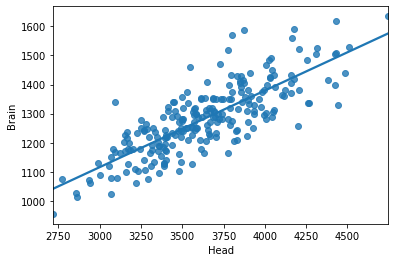

In [51]:
# Task 11

# Plotting code here; not autograde3d
# YOUR CODE HERE

import seaborn as sns

ax = sns.regplot(x = 'Head', y = "Brain", data=df, ci = None)


**Task 12** - Making a prediction

We're going to use our model to make a prediction. A healthy human has a brain size of 4100 cubic cm. How much do we expect his or her brain to weigh?

* assign the value 4100 to the variable `x_healthy`
* using your `slope` and `intercept` values, determine the weight of a brain of size `x_healthy`; assign this value to `predict_healthy`


In [52]:
# Task 12

# YOUR CODE HERE
x_healthy = 4100
predict_healthy = intercept + slope*x_healthy

# View your prediction
print('Prediction for a brain size of 4100 cc:', predict_healthy)

Prediction for a brain size of 4100 cc: 1405.6337129559786


**Task 12 - Test**

In [53]:
# Task 12 - Test

assert x_healthy == 4100, "Make sure to correct set your x variable."

**Task 13** - Calculating a residual

Now that we've made a prediction, we can take a look at a *model residual*. For this task, you will calculate and interpret the model residual for the first observation in the dataset. Remember that the first observation in the dataset is `Head`=4512 cubic centimeters.

* assign the value of 4512 to the variable `x_first`
* assign the value of the first observation for `Brain` to the variable `observed_first` (*it is your job to look-up this value in your DataFrame)
* calculate the predicted value and assign it to the variable `predict_first`
* calculate the residual and assign it to the variable `residual_first` (*Hint: use the equation observed - predicted*)

In [58]:
# Task 13

# YOUR CODE HERE
x_first = 4512
observed_first = dep_y[0]
predict_first = intercept + slope*x_first

residual_first = observed_first - predict_first

# View your prediction and residual 
print('Prediction for a brain size of 4512 cc:', predict_first)
print('Residual for the prediction:', residual_first)

Prediction for a brain size of 4512 cc: 1514.166600825611
Residual for the prediction: 15.833399174388887


**Task 13 - Test**

In [59]:
# Task 13 - Test

assert x_first == 4512, "Make sure to correct set your x variable."

## Part B

### Sleep Data


Use the following information to answer Tasks 14 - 16 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below. 

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

* load in the CSV file as a DataFrame and assign it to the variable `df_sleep`
* make sure to view the DataFrame!

In [75]:
# Task 14

data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2, skipinitialspace=True, header=0)
# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Task 14 - Test**

In [76]:
# Task 14 - Test

assert isinstance(df_sleep, pd.DataFrame), 'Have you created a DataFrame named `df_sleep`?'
assert len(df_sleep) == 42


**Task 15**

Write a function that replaces the `_` character in each animal name with a space.  For example,  Asian_elephant = Asian elephant.

Hint: use the `string.replace()` string method. Look up the documentation or the Canvas material to help.

* write your function and define it with the name `name_nospace`
* use your function to add an additional column to the `df_sleep` DataFrame; this new column should be named `Animal_name`. (*Hint: consider using the `.apply()` method on your DataFrame*)

In [82]:
# Task 15

# Write your function here
def name_nospace(x):
  y = x.replace("_", " ")
  return y

# YOUR CODE HERE
df_sleep['Animal_name'] = df_sleep['Animal'].apply(name_nospace)

# View your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Animal_name
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,African giant pouched rat
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,Asian elephant
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,Baboon
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,Big brown bat
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,Brazilian tapir


**Task 15 - Test**

In [83]:
# Task 15 - Test

assert name_nospace('Test_name') == 'Test name', 'Double check your function and that it returns the correct name.'


**Task 15** - Plotting relationships

For this task, you will plot the relationships between three different variables: life expectancy, total sleep, and gestation time. We want to look at pairs of relationships, so we'll make use of the seaborn pairplot

* use `sns.pairplot` to plot these three variables

This task will not be autograded - but it is part of the project!

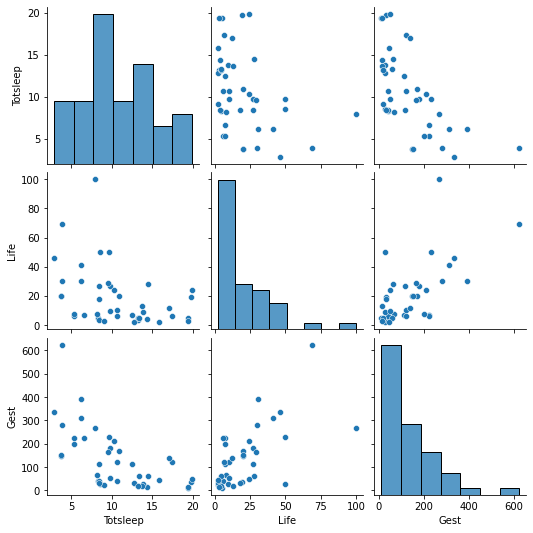

In [84]:
# Task 15

# Plotting code here; not autograde3d
# YOUR CODE HERE
import seaborn as sns

to_plot = df_sleep[['Totsleep','Life','Gest']]

sns.pairplot(to_plot)


**Task 16** - Correlation calculations

On this final graded task, we're going to complete two more correlation calculations.

* Calculate the correlation between life expectancy and total sleep - assign your result to `corr_life_sleep`
* Calculate the correlation between gestation time and total sleep - assign your result to `corr_gest_sleep`

In [90]:
# Task 16

# YOUR CODE HERE
import numpy as np
corr_life_sleep = np.corrcoef(df_sleep['Life'],df_sleep['Totsleep'])
corr_gest_sleep = np.corrcoef(df_sleep['Gest'],df_sleep['Totsleep'])


print("Correlation between total sleep and life expectancy=", corr_life_sleep[0,1])
print("Correlation between total sleep and gestation time=", corr_gest_sleep[0,1])

Correlation between total sleep and life expectancy= -0.3824461769490717
Correlation between total sleep and gestation time= -0.6144743061371066


**Task 16 - Test**

In [91]:
# Task 16 - Test

# Hidden tests - you will see the results when you submit to Canvas


## Portfolio Project Assignment

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).